C:\Users\최지원\AppData\Local\Temp\ipykernel_19752\1379478693.py:32: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')


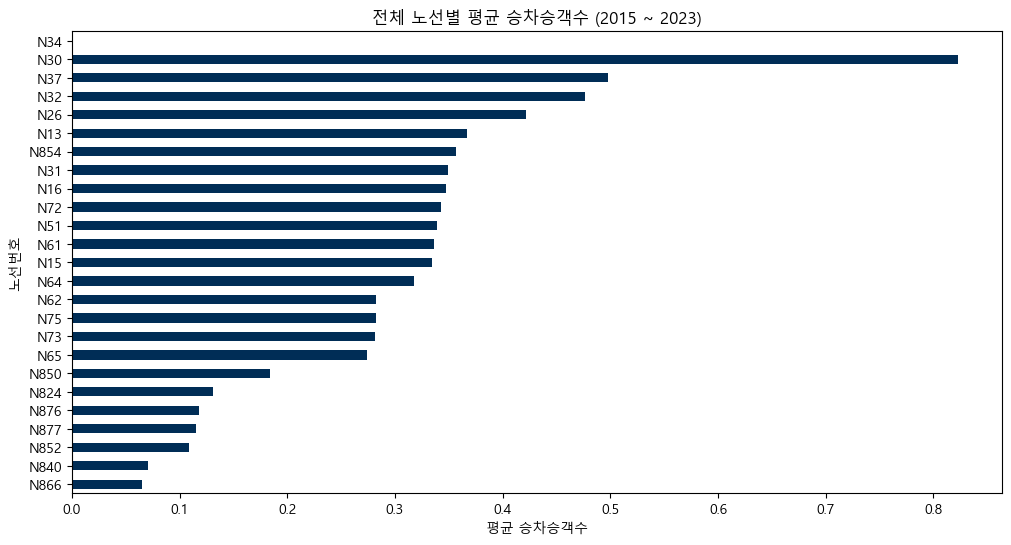

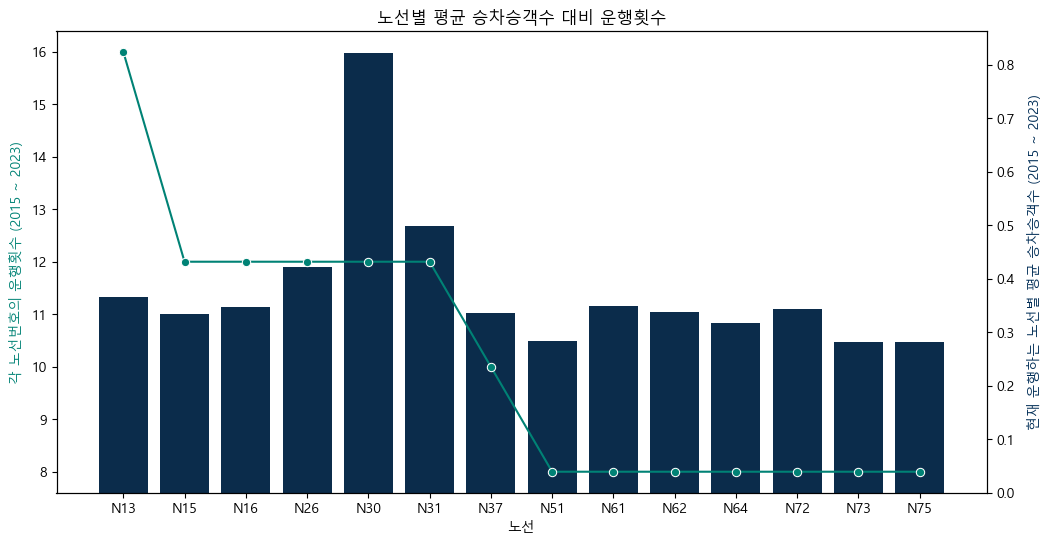

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

# 모든 노선번호에 대한 회당평균승차승객수를 저장할 데이터프레임
overall_average_df = pd.DataFrame()

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51','N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 노선번호별 회당평균승차승객수를 저장할 데이터프레임 (현재 운행하는 노선만)
target_average_df = pd.DataFrame()

# 각 연도별로 데이터 처리
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    
    # CSV 파일을 데이터프레임으로 읽어오기
    df = pd.read_csv(file_path, encoding='cp949')
    
    # '회당평균승차승객수' 열의 데이터 타입을 숫자(float)로 변환
    df['회당평균승차승객수'] = pd.to_numeric(df['회당평균승차승객수'], errors='coerce')
    
    # 전체 노선번호별로 그룹화하여 회당평균승차승객수의 평균 계산
    avg_boarding_per_route = df.groupby('노선번호')['회당평균승차승객수'].mean().reset_index()
    
    # 노선번호를 인덱스로 설정
    avg_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    overall_average_df = pd.concat([overall_average_df, avg_boarding_per_route], axis=1)
    
    # 현재 운행하는 노선번호에 해당하는 데이터만 선택
    filtered_df = df[df['노선번호'].isin(target_routes)]
    
    # 현재 운행하는 노선번호별로 그룹화하여 회당평균승차승객수의 평균 계산
    target_avg_boarding_per_route = filtered_df.groupby('노선번호')['회당평균승차승객수'].mean().reset_index()
    
    # 노선번호를 인덱스로 설정
    target_avg_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    target_average_df = pd.concat([target_average_df, target_avg_boarding_per_route], axis=1)

# 모든 노선번호에 대한 평균값 계산
overall_average = overall_average_df.mean(axis=1)

# 시각화 - 전체 노선번호
plt.figure(figsize=(12, 6))
ax = overall_average.sort_values().plot(kind='barh', color='#002D56')
ax.set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.title('전체 노선별 평균 승차승객수 (2015 ~ 2023)')
plt.xlabel('평균 승차승객수')
plt.ylabel('노선번호')

plt.show()

# 모든 노선번호에 대한 평균값 계산 (현재 운행하는 노선만)
target_overall_average = target_average_df.mean(axis=1)

# 각 노선번호 운행횟수 추출
first_encounter_operation_count = df.groupby('노선번호')['일일운행횟수'].first()

sorted_first_encounter_operation_count = first_encounter_operation_count.sort_values(ascending=False)

# 시각화 - 평균 승차승객수 대비 운행횟수
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x=target_routes, y=target_overall_average, color='#002D56', ax=ax1)
ax2 = ax1.twinx()
ax2.yaxis.tick_left()
ax1.yaxis.tick_right()
sns.lineplot(x=target_routes, y=sorted_first_encounter_operation_count, color='#008275', marker='o', ax=ax2)
ax1.set_title('노선별 평균 승차승객수 대비 운행횟수')
ax1.set_xlabel('노선')
ax1.set_ylabel('현재 운행하는 노선별 평균 승차승객수 (2015 ~ 2023)', color='#002D56')
ax2.set_ylabel('각 노선번호의 운행횟수 (2015 ~ 2023)', color='#008275')
ax1.yaxis.set_label_coords(1.06, 0.5)
ax2.yaxis.set_label_coords(-0.05, 0.5)

# Show the plot
plt.show()

C:\Users\최지원\AppData\Local\Temp\ipykernel_19752\2107285006.py:33: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')


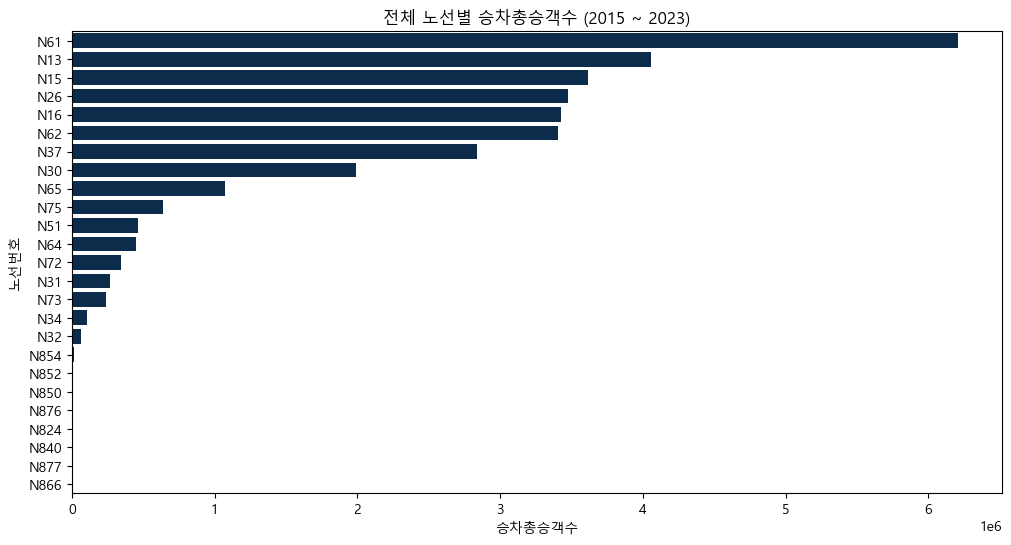

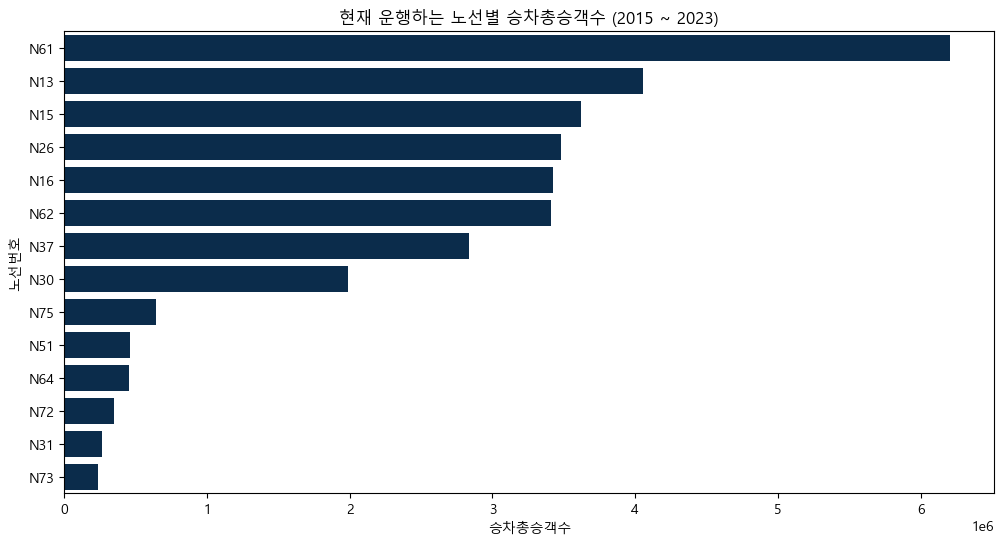

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

# 모든 노선번호에 대한 승차총승객수를 저장할 데이터프레임
overall_total_boarding_df = pd.DataFrame()

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51', 'N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 노선번호별 승차총승객수를 저장할 데이터프레임 (현재 운행하는 노선만)
target_total_boarding_df = pd.DataFrame()

# 각 연도별로 데이터 처리
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    
    # CSV 파일을 데이터프레임으로 읽어오기
    df = pd.read_csv(file_path, encoding='cp949')
    
    # '승차총승객수' 열의 데이터 타입을 숫자(float)로 변환
    df['승차총승객수'] = pd.to_numeric(df['승차총승객수'], errors='coerce')
    
    # 전체 노선번호별로 그룹화하여 승차총승객수의 합계 계산
    total_boarding_per_route = df.groupby('노선번호')['승차총승객수'].sum().reset_index()
    
    # 노선번호를 인덱스로 설정
    total_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    overall_total_boarding_df = pd.concat([overall_total_boarding_df, total_boarding_per_route], axis=1)
    
    # 현재 운행하는 노선번호에 해당하는 데이터만 선택
    filtered_df = df[df['노선번호'].isin(target_routes)]
    
    # 현재 운행하는 노선번호별로 그룹화하여 승차총승객수의 합계 계산
    target_total_boarding_per_route = filtered_df.groupby('노선번호')['승차총승객수'].sum().reset_index()
    
    # 노선번호를 인덱스로 설정
    target_total_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    target_total_boarding_df = pd.concat([target_total_boarding_df, target_total_boarding_per_route], axis=1)

# 모든 노선번호에 대한 합계값 계산
overall_total_boarding = overall_total_boarding_df.sum(axis=1)

# 시각화 - 전체 노선번호
plt.figure(figsize=(12, 6))
melted_data = overall_total_boarding.reset_index().melt(id_vars='노선번호', var_name='Year', value_name='승차총승객수')
order = melted_data.groupby('노선번호')['승차총승객수'].sum().sort_values(ascending=False).index
sns.barplot(x='승차총승객수', y='노선번호', hue='Year', data=melted_data, estimator=sum, palette=['#002D56']*len(melted_data['Year'].unique()), order=order, legend=False)
plt.title('전체 노선별 승차총승객수 (2015 ~ 2023)')
plt.xlabel('승차총승객수')
plt.ylabel('노선번호')

# 백만 단위로 표기되게 하는 함수
def million_formatter(x, pos):
    return f'{x / 1e6:.0f} 백만'

# y축에 백만(M)으로 표기
ax.xaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.show()

# 모든 노선번호에 대한 합계값 계산 (현재 운행하는 노선만)
target_overall_total_boarding = target_total_boarding_df.sum(axis=1)

# 시각화 - 현재 운행하는 노선번호만
plt.figure(figsize=(12, 6))
melted_target_data = target_overall_total_boarding.reset_index().melt(id_vars='노선번호', var_name='Year', value_name='승차총승객수')
target_order = melted_target_data.groupby('노선번호')['승차총승객수'].sum().sort_values(ascending=False).index
sns.barplot(x='승차총승객수', y='노선번호', hue='Year', data=melted_target_data, estimator=sum, palette=['#002D56']*len(melted_target_data['Year'].unique()), order=target_order, legend=False)
plt.title('현재 운행하는 노선별 승차총승객수 (2015 ~ 2023)')
plt.xlabel('승차총승객수')
plt.ylabel('노선번호')

# Show the plot
plt.show()

# 백만 단위로 표기되게 하는 함수
ax.xaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.show()

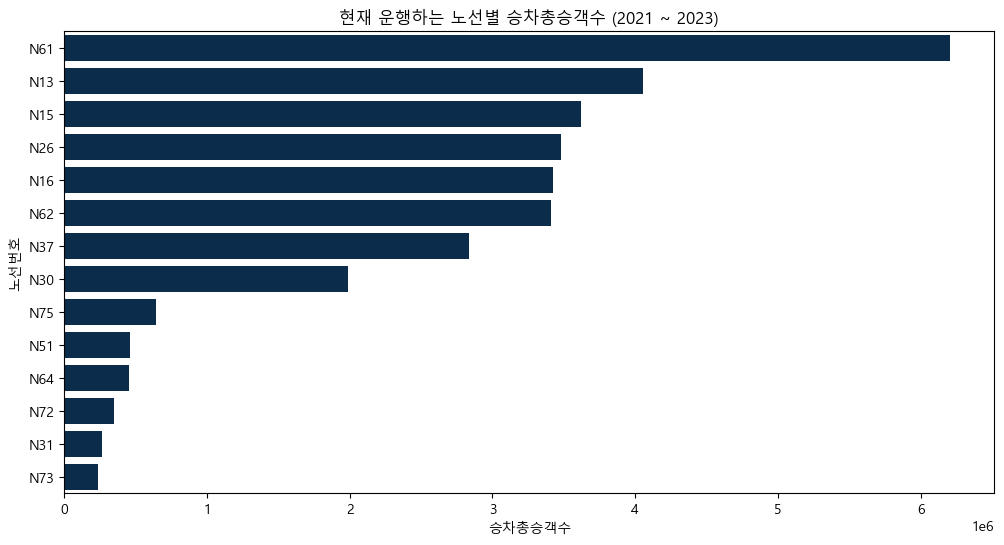

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 백만 단위로 표기되게 하는 함수
def million_formatter(x, pos):
    return f'{x / 1e6:.1f} 백만'

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2021년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2021, 2024)]

# 모든 노선번호에 대한 승차총승객수를 저장할 데이터프레임
overall_total_boarding_df = pd.DataFrame()

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51', 'N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 노선번호별 승차총승객수를 저장할 데이터프레임 (현재 운행하는 노선만)
target_total_boarding_df = pd.DataFrame()

# 각 연도별로 데이터 처리
for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    
    # CSV 파일을 데이터프레임으로 읽어오기
    df = pd.read_csv(file_path, encoding='cp949')
    
    # '승차총승객수' 열의 데이터 타입을 숫자(float)로 변환
    df['승차총승객수'] = pd.to_numeric(df['승차총승객수'], errors='coerce')
    
    # 전체 노선번호별로 그룹화하여 승차총승객수의 합계 계산
    total_boarding_per_route = df.groupby('노선번호')['승차총승객수'].sum().reset_index()
    
    # 노선번호를 인덱스로 설정
    total_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    overall_total_boarding_df = pd.concat([overall_total_boarding_df, total_boarding_per_route], axis=1)
    
    # 현재 운행하는 노선번호에 해당하는 데이터만 선택
    filtered_df = df[df['노선번호'].isin(target_routes)]
    
    # 현재 운행하는 노선번호별로 그룹화하여 승차총승객수의 합계 계산
    target_total_boarding_per_route = filtered_df.groupby('노선번호')['승차총승객수'].sum().reset_index()
    
    # 노선번호를 인덱스로 설정
    target_total_boarding_per_route.set_index('노선번호', inplace=True)
    
    # 데이터프레임을 미리 생성한 데이터프레임에 추가
    target_total_boarding_df = pd.concat([target_total_boarding_df, target_total_boarding_per_route], axis=1)

# 모든 노선번호에 대한 합계값 계산
overall_total_boarding = overall_total_boarding_df.sum(axis=1)

plt.show()

# 모든 노선번호에 대한 합계값 계산 (현재 운행하는 노선만)
plt.figure(figsize=(12, 6))
melted_target_data = target_overall_total_boarding.reset_index().melt(id_vars='노선번호', var_name='Year', value_name='승차총승객수')

# Create a horizontal bar plot with Seaborn, sorted in descending order, without legend
target_order = melted_target_data.groupby('노선번호')['승차총승객수'].sum().sort_values(ascending=False).index
sns.barplot(x='승차총승객수', y='노선번호', hue='Year', data=melted_target_data, estimator=sum, palette=['#002D56']*len(melted_target_data['Year'].unique()), order=target_order, legend=False)

# Customize the plot
plt.title('현재 운행하는 노선별 승차총승객수 (2021 ~ 2023)')
plt.xlabel('승차총승객수')
plt.ylabel('노선번호')

# Show the plot
plt.show()

# 백만 단위로 표기되게 하는 함수
ax.xaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.show()